### Findings (what did I find in this notebook?)

- The `simulationPrice` (the price of a product in the simulation period) of items are highly right-skewed, with over **8500** items having a price **less than 100**.
- Prices ranged from a minimum of **0.38** up to **9055.07**.
- Out of the **1843** promoted items, **1653** items were promoted on one day, **157** items were promoted on two different days, and **33** items were promoted on three different days.
- Items that were promoted more than once have a `simulationPrice` less than **365**.
- For items with more than one promotion date, the second and third dates occur *after* the first and second dates.
- A total of 14 unique promotion dates were found over a continuous two-week period, from **2018-06-30** to **2018-07-13**. Summer sale? Summer items?

### Tasks (what did I do in this notebook?)

- Explored `infos` dataset by plotting distributions of `simulationPrice` and finding unique promotion dates.
- Separated promoted items from non-promoted items to analyse them separately. Furthermore, divided promoted items into 3 data subsets based on number of days they were promoted.
- Made separate promotion date columns for items with more than one promotion day.
- Converted promotion dates from object to datetime type.
- Saved the three data subsets (`promo1`, `promo2`, `promo3`) in csv format to the home directory (not the original DMC-2020 folder).

**Ismail Dawoodjee 12:17 PM 27-May-2020**

# Data Exploration Part 1

This notebook will focus on exploring the `infos` dataset. Import analysis and visualization libraries, and read in the pickled version of the `infos` dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
infos = pd.read_pickle('infos.pkl')

In [3]:
infos.shape

(10463, 3)

In [4]:
infos.columns

Index(['itemID', 'simulationPrice', 'promotion'], dtype='object')

In [5]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           10463 non-null  int64  
 1   simulationPrice  10463 non-null  float64
 2   promotion        1843 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 245.4+ KB


In [6]:
infos.describe()

,itemID,simulationPrice
count,10463.000000,10463.000000
mean,5232.000000,122.010808
std,3020.552267,469.701306
min,1.000000,0.380000
25%,2616.500000,8.990000
50%,5232.000000,23.830000
75%,7847.500000,63.125000
max,10463.000000,9055.070000


In [7]:
infos

,itemID,simulationPrice,promotion
0,1,3.43,NaN
1,2,9.15,NaN
2,3,14.04,NaN
3,4,14.10,NaN
4,5,7.48,NaN
...,...,...,...
10458,10459,14.71,NaN
10459,10460,325.67,NaN
10460,10461,190.53,NaN
10461,10462,304.30,NaN


In [231]:
(infos['simulationPrice'] < 100).sum()

8639

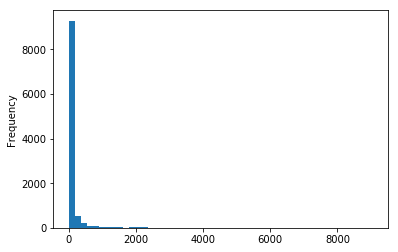

In [169]:
infos['simulationPrice'].plot.hist(bins = 50)

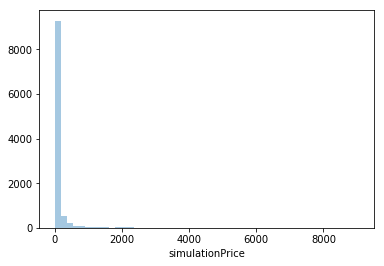

In [163]:
sns.distplot(infos['simulationPrice'], kde = False)

- Over 10000 items have a `simulationPrice_infos` less than 1000, with the distribution being highly right-skewed.

In [47]:
promo = infos[infos['promotion'].isnull() == False]

In [13]:
promo

,itemID,simulationPrice,promotion
25,26,14.27,2018-07-13
26,27,1.64,2018-07-13
28,29,56.13,2018-07-13
34,35,337.84,"2018-07-01,2018-07-02,2018-07-13"
57,58,277.72,2018-07-13
...,...,...,...
10446,10447,44.99,2018-07-10
10447,10448,63.00,2018-07-10
10449,10450,44.43,2018-07-10
10454,10455,62.84,2018-07-11


In [17]:
[(promo['promotion'].str.len() == 10).sum(), 
(promo['promotion'].str.len() == 21).sum(), 
(promo['promotion'].str.len() == 32).sum()]

[1653, 157, 33]

- Out of all the promoted items, **1653** items were promoted once, **157** items were promoted twice, and **33** items were promoted three times.

In [48]:
promo1 = promo[promo['promotion'].str.len() == 10]
promo2 = promo[promo['promotion'].str.len() == 21]
promo3 = promo[promo['promotion'].str.len() == 32]

- Look at the `simulationPrice` range of promoted items.

In [40]:
[promo1.describe(), ' ',
promo2.describe(), ' ',
promo3.describe()]

[             itemID  simulationPrice
 count   1653.000000      1653.000000
 mean    5295.734422        66.449268
 std     2995.130290       234.396236
 min       26.000000         0.390000
 25%     2906.000000         8.570000
 50%     5018.000000        22.360000
 75%     7860.000000        53.770000
 max    10457.000000      6940.080000,
 ' ',
              itemID  simulationPrice
 count    157.000000       157.000000
 mean    4856.611465        38.553439
 std     2877.678239        66.333702
 min       75.000000         0.970000
 25%     3300.000000         5.340000
 50%     4417.000000        13.640000
 75%     7341.000000        31.480000
 max    10319.000000       364.940000,
 ' ',
              itemID  simulationPrice
 count     33.000000        33.000000
 mean    4172.121212        30.787879
 std     2362.158808        65.321992
 min       35.000000         1.050000
 25%     2855.000000         6.730000
 50%     3748.000000        12.790000
 75%     5048.000000        22.01000

- Items that were promoted more than once did not have a `simulationPrice` greater than 365.

- Convert `promotion` dates to datetime type and separate the dates on `promo2` and `promo3` datasets as well.

In [58]:
promo1.loc[:,'promotion'] = pd.to_datetime(promo1.loc[:,'promotion'], infer_datetime_format = True)

In [97]:
date_split2 = promo2['promotion'].str.split(pat = ',', expand = True)

In [ ]:
promo2.loc[:,'promotion'] = date_split2[0] 
promo2.loc[:,'promotion2'] = date_split2[1] 

In [104]:
promo2.loc[:,'promotion'] = pd.to_datetime(promo2.loc[:,'promotion'], infer_datetime_format = True)
promo2.loc[:,'promotion2'] = pd.to_datetime(promo2.loc[:,'promotion2'], infer_datetime_format = True)

In [108]:
date_split3 = promo3['promotion'].str.split(pat = ',', expand = True)

In [ ]:
promo3.loc[:,'promotion'] = date_split3.loc[:,0] 
promo3.loc[:,'promotion2'] = date_split3.loc[:,1] 
promo3.loc[:,'promotion3'] = date_split3.loc[:,2] 

In [ ]:
promo3.loc[:,'promotion'] = pd.to_datetime(promo3.loc[:,'promotion'], infer_datetime_format = True)
promo3.loc[:,'promotion2'] = pd.to_datetime(promo3.loc[:,'promotion2'], infer_datetime_format = True)
promo3.loc[:,'promotion3'] = pd.to_datetime(promo3.loc[:,'promotion3'], infer_datetime_format = True)

In [255]:
promo1.head()

,itemID,simulationPrice,promotion
25,26,14.27,2018-07-13
26,27,1.64,2018-07-13
28,29,56.13,2018-07-13
57,58,277.72,2018-07-13
78,79,31.92,2018-07-05


In [252]:
promo2.head()

,itemID,simulationPrice,promotion,promotion2
74,75,31.34,2018-07-05,2018-07-11
124,125,5.07,2018-07-08,2018-07-13
125,126,13.63,2018-07-05,2018-07-11
353,354,103.54,2018-07-08,2018-07-11
356,357,63.18,2018-06-30,2018-07-13


In [253]:
promo3.head()

,itemID,simulationPrice,promotion,promotion2,promotion3
34,35,337.84,2018-07-01,2018-07-02,2018-07-13
501,502,199.69,2018-06-30,2018-07-01,2018-07-11
1336,1337,2.89,2018-07-04,2018-07-05,2018-07-06
1879,1880,11.83,2018-07-04,2018-07-05,2018-07-06
2025,2026,12.92,2018-07-04,2018-07-05,2018-07-06


In [256]:
promo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 25 to 10456
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   itemID           1653 non-null   int64         
 1   simulationPrice  1653 non-null   float64       
 2   promotion        1653 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 51.7 KB


In [257]:
promo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 74 to 10318
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   itemID           157 non-null    int64         
 1   simulationPrice  157 non-null    float64       
 2   promotion        157 non-null    datetime64[ns]
 3   promotion2       157 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 11.1 KB


In [258]:
promo3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 34 to 10111
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   itemID           33 non-null     int64         
 1   simulationPrice  33 non-null     float64       
 2   promotion        33 non-null     datetime64[ns]
 3   promotion2       33 non-null     datetime64[ns]
 4   promotion3       33 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 1.5 KB


- Explore the `simulationPrice` distribution of the three data subsets.

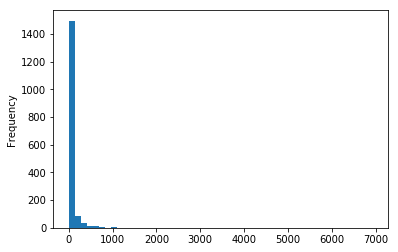

In [168]:
promo1['simulationPrice'].plot.hist(bins = 50)

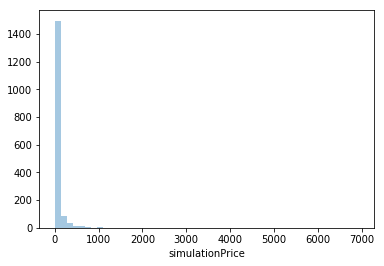

In [160]:
sns.distplot(promo1['simulationPrice'], kde = False)

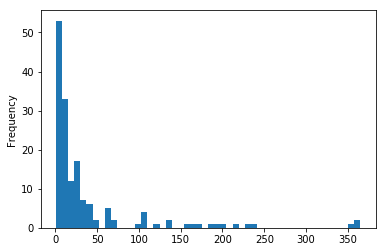

In [174]:
promo2['simulationPrice'].plot.hist(bins = 50)

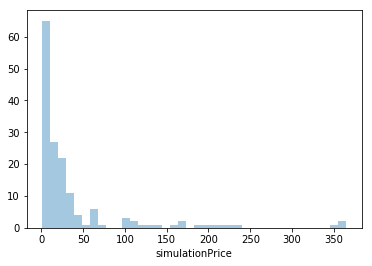

In [161]:
sns.distplot(promo2['simulationPrice'], kde = False)

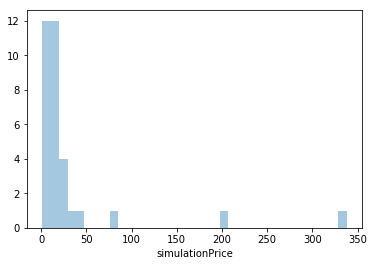

In [162]:
sns.distplot(promo3['simulationPrice'], kde = False)

- Check how many different promotion dates there are in each data subset.

In [181]:
[promo1['promotion'].nunique(), 
(promo2['promotion'].nunique(), promo2['promotion2'].nunique()),
(promo3['promotion'].nunique(), promo3['promotion2'].nunique(), promo3['promotion3'].nunique())]

[14, (12, 13), (6, 9, 9)]

- For items with more than one promotion date, do the second and third dates occur AFTER the first and second dates?

In [192]:
(promo2['promotion2'] > promo2['promotion']).all()

True

In [195]:
(promo3['promotion2'] > promo3['promotion']).all(), (promo3['promotion3'] > promo3['promotion2']).all()

(True, True)

- What are the unique promotion dates?

In [222]:
['promo1', set(promo1['promotion']), 
 'promo2', set(promo2['promotion']), ' ', set(promo2['promotion2']),
 'promo3', set(promo3['promotion']), ' ', set(promo3['promotion2']), ' ', set(promo3['promotion3'])]

['promo1',
 {Timestamp('2018-06-30 00:00:00'),
  Timestamp('2018-07-01 00:00:00'),
  Timestamp('2018-07-02 00:00:00'),
  Timestamp('2018-07-03 00:00:00'),
  Timestamp('2018-07-04 00:00:00'),
  Timestamp('2018-07-05 00:00:00'),
  Timestamp('2018-07-06 00:00:00'),
  Timestamp('2018-07-07 00:00:00'),
  Timestamp('2018-07-08 00:00:00'),
  Timestamp('2018-07-09 00:00:00'),
  Timestamp('2018-07-10 00:00:00'),
  Timestamp('2018-07-11 00:00:00'),
  Timestamp('2018-07-12 00:00:00'),
  Timestamp('2018-07-13 00:00:00')},
 'promo2',
 {Timestamp('2018-06-30 00:00:00'),
  Timestamp('2018-07-01 00:00:00'),
  Timestamp('2018-07-02 00:00:00'),
  Timestamp('2018-07-03 00:00:00'),
  Timestamp('2018-07-04 00:00:00'),
  Timestamp('2018-07-05 00:00:00'),
  Timestamp('2018-07-06 00:00:00'),
  Timestamp('2018-07-07 00:00:00'),
  Timestamp('2018-07-08 00:00:00'),
  Timestamp('2018-07-09 00:00:00'),
  Timestamp('2018-07-10 00:00:00'),
  Timestamp('2018-07-11 00:00:00')},
 ' ',
 {Timestamp('2018-07-01 00:00:00')

- Looks like all promotions took place over a **two week period from 2018-06-30 to 2018-07-13**.

- Save the `promo` data subsets to home directory (not in the original DMC-2020 folder).

In [227]:
promo1.to_csv('promo1.csv', index = False)
promo2.to_csv('promo2.csv', index = False)
promo3.to_csv('promo3.csv', index = False)